In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
# Load the data from GitHub repository
train_url = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz"
train_labels_url = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz"
test_url = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz"
test_labels_url = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz"

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Reshape the data to 4D (batch_size, width, height, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 62s 81ms/step - loss: 0.4556 - accuracy: 0.8357 - val_loss: 0.3404 - val_accuracy: 0.8749
Epoch 2/10
750/750 [==============================] - 66s 88ms/step - loss: 0.2991 - accuracy: 0.8902 - val_loss: 0.2742 - val_accuracy: 0.9011
Epoch 3/10
750/750 [==============================] - 60s 80ms/step - loss: 0.2523 - accuracy: 0.9083 - val_loss: 0.2801 - val_accuracy: 0.8997
Epoch 4/10
750/750 [==============================] - 59s 78ms/step - loss: 0.2204 - accuracy: 0.9194 - val_loss: 0.2486 - val_accuracy: 0.9090
Epoch 5/10
750/750 [==============================] - 54s 72ms/step - loss: 0.1967 - accuracy: 0.9284 - val_loss: 0.2344 - val_accuracy: 0.9147
Epoch 6/10
750/750 [==============================] - 57s 75ms/step - loss: 0.1755 - accuracy: 0.9349 - val_loss: 0.2435 - val_accuracy: 0.9133
Epoch 7/10
750/750 [==============================] - 58s 78ms/step - loss: 0.1537 - accuracy: 0.9429 - val_loss: 0.2251 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 12ms/step - loss: 0.2741 - accuracy: 0.9125
Test accuracy: 0.9125000238418579


In [ ]:
predictions = model.predict(x_test)


313/313 [==============================] - 4s 13ms/step


1/1 [==============================] - 0s 39ms/step


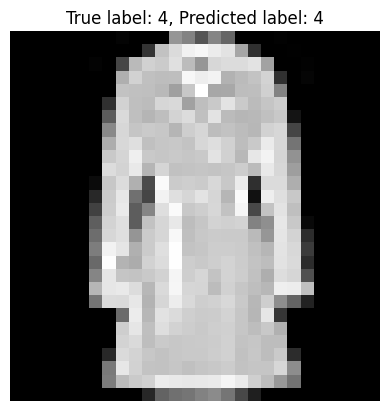

In [ ]:
# Choose a random test sample
sample_index = np.random.randint(3, len(x_test))
sample_image = x_test[sample_index]
true_label = np.argmax(y_test[sample_index])

# Make prediction
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the sample image and prediction
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.axis('off')
plt.show()


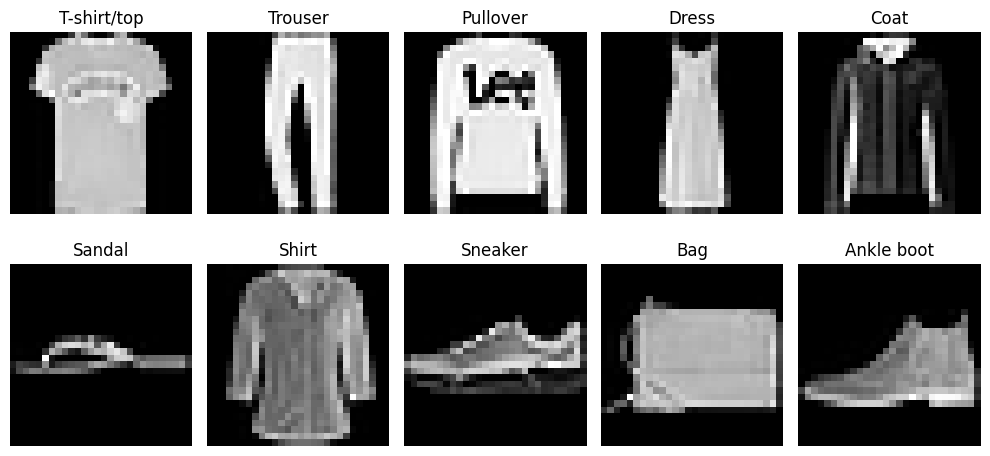

In [ ]:
# Mapping of label indices to human-readable labels
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Create a figure with 10 subplots
plt.figure(figsize=(10, 5))
for i in range(10):
    # Find the first image with the current label
    index = np.where(y_test[:, i] == 1)[0][0]
    image = x_test[index].squeeze()

    # Plot the image
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(label_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
